# Multiple Layer LSTM

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.4.1


In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


In [4]:
tokenizer = info.features['text'].encoder

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 134s 252ms/step - loss: 0.5911 - accuracy: 0.6617 - val_loss: 0.4669 - val_accuracy: 0.8027
Epoch 2/10
391/391 [==============================] - 97s 248ms/step - loss: 0.3882 - accuracy: 0.8433 - val_loss: 0.4598 - val_accuracy: 0.7855
Epoch 3/10
391/391 [==============================] - 97s 247ms/step - loss: 0.3118 - accuracy: 0.8813 - val_loss: 0.3867 - val_accuracy: 0.8387
Epoch 4/10
391/391 [==============================] - 98s 250ms/step - loss: 0.2255 - accuracy: 0.9161 - val_loss: 0.4126 - val_accuracy: 0.8335
Epoch 5/10
391/391 [==============================] - 97s 248ms/step - loss: 0.2008 - accuracy: 0.9246 - val_loss: 0.4643 - val_accuracy: 0.8139
Epoch 6/10
391/391 [==============================] - 98s 249ms/step - loss: 0.2168 - accuracy: 0.9216 - val_loss: 0.4492 - val_accuracy: 0.8352
Epoch 7/10
391/391 [==============================] - 97s 248ms/step - loss: 0.1255 - accuracy: 0.9581 - val_loss: 0.5327 - val_a

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

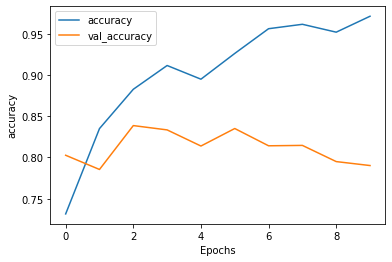

In [11]:
plot_graphs(history, 'accuracy')

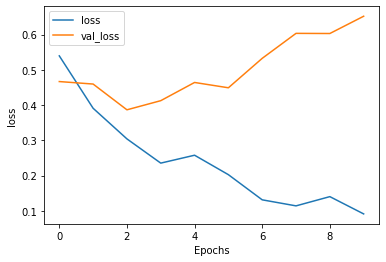

In [12]:
plot_graphs(history, 'loss')